In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


# Reading the Data

In [2]:
train_df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
test_df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

In [3]:
train_df.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [4]:
train_df.shape

(13636, 15)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


# Summary Statistics

In [6]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,13636.0,1.210853e+02,1.169956e+02,0.000000e+00,4.500000e+01,9.100000e+01,1.480000e+02,7.240000e+02
RecipeNumber,13636.0,3.862438e+01,2.967235e+01,1.000000e+00,1.200000e+01,3.300000e+01,6.300000e+01,1.000000e+02
RecipeCode,13636.0,2.178599e+04,2.388319e+04,3.860000e+02,6.504000e+03,1.460000e+04,3.312100e+04,1.917750e+05
UserReputation,13636.0,2.160311e+00,1.008642e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+02
CreationTimestamp,13636.0,1.623713e+09,5.444020e+06,1.613035e+09,1.622717e+09,1.622718e+09,1.622718e+09,1.665756e+09
ReplyCount,13636.0,1.452039e-02,1.373234e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
ThumbsUpCount,13636.0,1.098269e+00,4.166487e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+01
ThumbsDownCount,13636.0,5.437078e-01,3.265660e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02
Rating,13636.0,4.288721e+00,1.544839e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
BestScore,13636.0,1.531279e+02,1.409869e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,9.460000e+02


# Checking Null Values in Our Dataset(if there is any)

In [7]:
train_df.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

## We can see 2 null values in our train data. We will deal with it later.

In [8]:
test_df.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

## We don't have null values in test dataset. Therefore we need not to worry about replacing any null values here

# Drop rows with missing values

In [9]:
train_df.dropna(inplace=True)

# GRAPH 

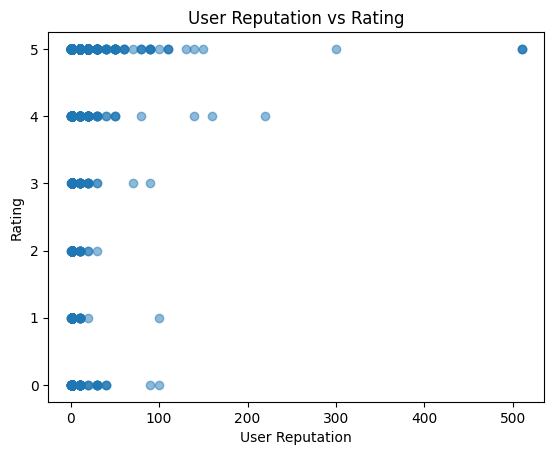

In [10]:
import matplotlib.pyplot as plt

df = train_df.copy()

plt.scatter(df["UserReputation"], df["Rating"], alpha=0.5)
plt.title("User Reputation vs Rating")
plt.xlabel("User Reputation")
plt.ylabel("Rating")
plt.show()

# Feature Engineering 

In [11]:
train_df.head(5)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


## Here we are creating a single columns using two different columns ( 'ThumbsUpCount' and 'ThumbsDownCount')

In [12]:
train_df['ThumbsRatio'] = train_df['ThumbsUpCount'] / train_df['ThumbsDownCount']
test_df['ThumbsRatio'] = test_df['ThumbsUpCount'] / test_df['ThumbsDownCount']

## Here we are replacing NA Values with zero (Which came upon division with zero).

In [13]:
train_df['ThumbsRatio'] = train_df['ThumbsRatio'].fillna(0)
test_df['ThumbsRatio'] = test_df['ThumbsRatio'].fillna(0)

## We are counting frequency of words here (for better data cleaning)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

reviews = train_df['Recipe_Review']

count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(reviews)

word_count_df = pd.DataFrame(count_matrix.sum(axis=0), columns=count_vectorizer.get_feature_names_out())
word_count_df = word_count_df.transpose()
word_count_df.columns = ['Count']

top_words = word_count_df.sort_values(by='Count', ascending=False).head(25)
print("Top Words by Count:")
print(top_words)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

tfidf_df = pd.DataFrame(tfidf_matrix.sum(axis=0), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.transpose()
tfidf_df.columns = ['TF-IDF Score']

top_tfidf_terms = tfidf_df.sort_values(by='TF-IDF Score', ascending=False).head(10)
print("\nTop Terms by TF-IDF Score:")
print(top_tfidf_terms)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Top Words by Count:
           Count
recipe      7454
39          7210
make        4470
used        3233
good        2771
time        2411
delicious   2361
great       2261
added       2141
easy        2110
just        2043
family      1950
use         1933
like        1789
loved       1699
cake        1481
love        1460
add         1444
did         1442
soup        1404
instead     1377
34          1343
cheese      1315
really      1286
chicken     1265

Top Terms by TF-IDF Score:
           TF-IDF Score
recipe       647.953526
39           598.394605
make         514.147503
good         440.570574
delicious    408.382574
easy         395.425362
great        347.075513
family       336.263817
loved        328.495955
used         320.642210


We can see words like '39' and '34' are some of the unuseful words for our desired prediction for rating. So we will remove these words.

In [15]:
train_df['Recipe_Review'] = train_df['Recipe_Review'].str.replace('39', '')
test_df['Recipe_Review'] = test_df['Recipe_Review'].str.replace('39', '')


train_df['Recipe_Review'] = train_df['Recipe_Review'].str.replace('34', '')
test_df['Recipe_Review'] = test_df['Recipe_Review'].str.replace('34', '')

In [16]:
common_words = ['recipe', 'make', 'used']
train_df['Recipe_Review'] = train_df['Recipe_Review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in common_words]))
test_df['Recipe_Review'] = test_df['Recipe_Review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in common_words]))

Here we are removing the words which are not very useful for our desired prediction for rating. So we will remove these words.

In [17]:
train_df.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review', 'ThumbsRatio'],
      dtype='object')

In [18]:
columns_to_drop_from_train = ['ID', 'RecipeName', 'RecipeNumber', 'CommentID', 'UserName', 'Rating', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount']

We're removing the ID, RecipeName, and RecipeNumber because we already have the RecipeCode to identify specific recipes. CommentID, UserName, Rating, and CreationTimeStamp aren't very helpful for our Rating Prediction. Since we've already calculated the ThumbsRatio, we can drop ThumbsUpCount and ThumbsDownCount as well.

In [19]:
X = train_df.drop(columns_to_drop_from_train, axis=1)
y = train_df['Rating']

In [20]:
X.head(5)

,RecipeCode,UserID,UserReputation,BestScore,Recipe_Review,ThumbsRatio
0,12259,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,20,100,great recipe! I have made them just as written...,0.0
1,8202,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,1,100,This is an easy and quick that is great for th...,0.0
2,2832,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,1,100,I think I was looking for something extra spec...,0.0
3,100276,u_1oKZCQcKQZdQhDVBS7oISc216VA,1,100,This is our favorite grilled chicken recipe. G...,0.0
4,19731,u_1oKd4sudZQPgu6YALiC7bW7mKMs,1,100,Great basic recipe. I added 2 teaspoons Tuscan...,0.0


In [21]:
y.head(5)

0    5
1    5
2    3
3    5
4    4
Name: Rating, dtype: int64

In [22]:
test_df = test_df.drop(['ID', 'RecipeName', 'RecipeNumber', 'CommentID', 'UserName', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount'], axis=1)

Similar thing has been done (as we did in train dataset)

# Creating Pipeline after train_test_split

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

In [24]:
X.columns

Index(['RecipeCode', 'UserID', 'UserReputation', 'BestScore', 'Recipe_Review',
       'ThumbsRatio'],
      dtype='object')

In [25]:
text_column = 'Recipe_Review'

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words='english'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, text_column),
        ('cat', cat_transformer, ['RecipeCode', 'UserID'])
    ])

# MODELS

## LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', logistic_model)])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## CHECKING THE ACCURACY SCORE

In [28]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.777044371103777


In [29]:
test_predictions = clf.predict(test_df)

submission_df = pd.DataFrame({
    'ID': range(1, len(test_predictions) + 1), 
    'Rating': test_predictions
})

submission_df.to_csv('submission.csv', index=False)

print(submission_df.head())

   ID  Rating
0   1       5
1   2       5
2   3       5
3   4       5
4   5       5


## Cross validation on LogisticRegression Model

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', logistic_model)])


cv_scores = cross_val_score(clf, X_train, y_train, cv=5)  

print("Cross-validation scores:", cv_scores)

print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.77406049 0.77222731 0.76707932 0.76891334 0.76983035]
Mean cross-validation score: 0.7704221652627832


## RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
rfc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7748441510817748

## Hyperparameters Tuning the Random Forest Model

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best Score: 0.771431044967558


## KNN Model

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', knn_model)])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.7345067840117345


## Navie Bayes Model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

cat_columns = ['RecipeCode', 'UserID']

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_text = tfidf_vectorizer.fit_transform(X_train['Recipe_Review'])
X_test_text = tfidf_vectorizer.transform(X_test['Recipe_Review'])

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_cat = encoder.fit_transform(X_train[cat_columns])
X_test_cat = encoder.transform(X_test[cat_columns])

X_train_processed = hstack((X_train_text, X_train_cat))
X_test_processed = hstack((X_test_text, X_test_cat))

naive_bayes_model = MultinomialNB()

naive_bayes_model.fit(X_train_processed, y_train)

y_pred = naive_bayes_model.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7638430509717639
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       238
           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        78
           4       0.00      0.00      0.00       248
           5       0.76      1.00      0.87      2082

    accuracy                           0.76      2727
   macro avg       0.29      0.17      0.15      2727
weighted avg       0.67      0.76      0.66      2727



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVC MODEL

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

cat_columns = ['RecipeCode', 'UserID']

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_text = tfidf_vectorizer.fit_transform(X_train['Recipe_Review'])
X_test_text = tfidf_vectorizer.transform(X_test['Recipe_Review'])

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_cat = encoder.fit_transform(X_train[cat_columns])
X_test_cat = encoder.transform(X_test[cat_columns])


X_train_processed = hstack((X_train_text, X_train_cat))
X_test_processed = hstack((X_test_text, X_test_cat))

svm_model = SVC()


svm_model.fit(X_train_processed, y_train)

y_pred = svm_model.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7667766776677668
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.03      0.06       238
           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00        40
           3       1.00      0.03      0.05        78
           4       0.00      0.00      0.00       248
           5       0.77      1.00      0.87      2082

    accuracy                           0.77      2727
   macro avg       0.44      0.18      0.16      2727
weighted avg       0.69      0.77      0.67      2727



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Comparing Accuracy Score across models

In [37]:
logistic= 0.776677
randomforest = 0.775577
knn= 0.733039
naive_bayes = 0.763843
svc = 0.766776

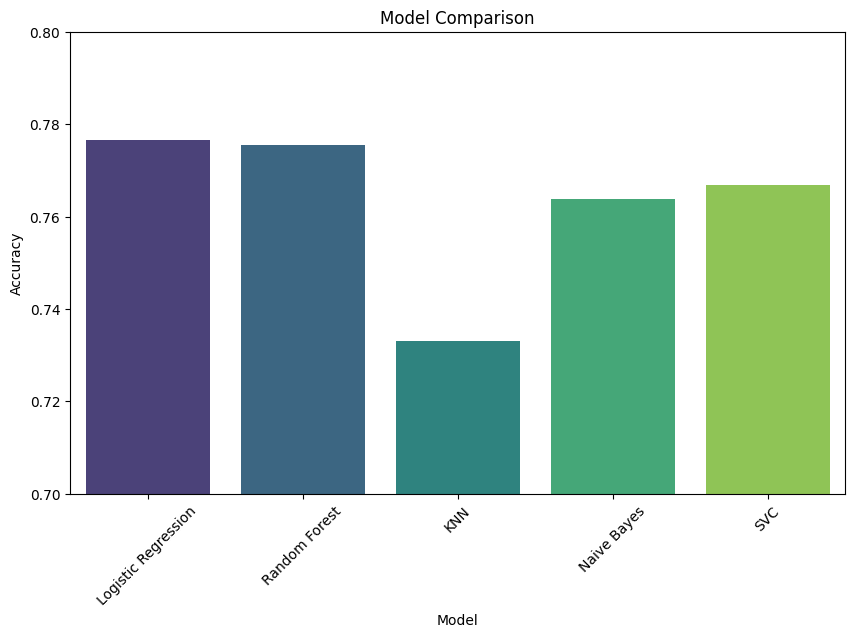

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes', 'SVC']
accuracies = [0.776677, 0.775577, 0.733039, 0.763843, 0.766776]

data = {'Model': models, 'Accuracy': accuracies}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.8)  
plt.xticks(rotation=45)  
plt.show()

## Based on the graph, it's evident that Logistic Regression has the highest accuracy score, making it the preferred model for making predictions.